In [91]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [92]:
# New Antecedent/Consequent objects hold universe variables and membership functions
# Create the three fuzzy variables - two inputs, two outputs
ph_membership = ctrl.Antecedent(np.arange(0, 14, 0.001), 'ph')
water_level_membership = ctrl.Antecedent(np.arange(0, 40, 0.1), 'water_level') # unit --> mm
ph_pump_membership = ctrl.Consequent(np.arange(0,8,0.1),"ph_pump") # duration unit --> seconds
alkaline_pump_membership = ctrl.Consequent(np.arange(0,8,0.1),"alkaline_pump") # duration unit --> seconds

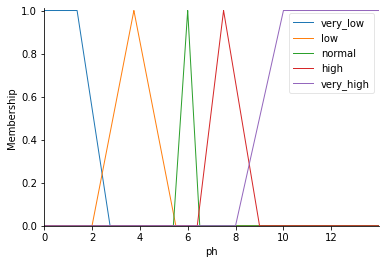

In [93]:
# Generate fuzzy membership functions for first input PH
ph_membership['very_low'] = fuzz.trapmf(ph_membership.universe,[0,0,1.375,2.75])
ph_membership['low'] = fuzz.trimf(ph_membership.universe,[ 2 , 3.75 , 5.5 ])
ph_membership['normal'] = fuzz.trimf(ph_membership.universe,[5.4 , 6 , 6.5])
ph_membership['high'] = fuzz.trimf(ph_membership.universe,[ 6.4 , 7.5 , 9 ])
ph_membership['very_high'] = fuzz.trapmf(ph_membership.universe,[ 8 , 10 , 14 , 14 ])
ph_membership.view()

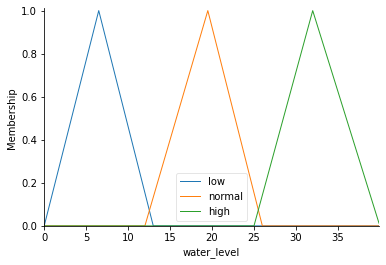

In [94]:
# Generate fuzzy membership functions for second intput water level
# Unit --> mm 

water_level_membership['low']   = fuzz.trimf(water_level_membership.universe,[0,6.5,13]) 
water_level_membership['normal'] = fuzz.trimf(water_level_membership.universe,[12,19.5,26]) 
water_level_membership['high']    = fuzz.trimf(water_level_membership.universe,[25,32,40]) 
water_level_membership.view()

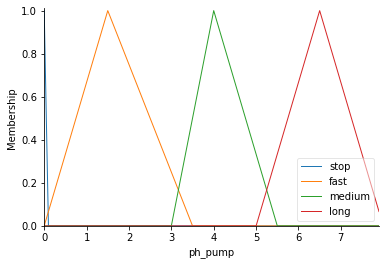

In [95]:
# Generate fuzzy membership functions for output PH Pump Duration
ph_pump_membership["stop"] = fuzz.trimf(ph_pump_membership.universe,[ 0,0,0])
ph_pump_membership["fast"] = fuzz.trimf(ph_pump_membership.universe,[0,1.5,3.5])
ph_pump_membership["medium"] = fuzz.trimf(ph_pump_membership.universe,[3,4,5.5])
ph_pump_membership["long"] = fuzz.trimf(ph_pump_membership.universe,[ 5,6.5,8])
ph_pump_membership.view()

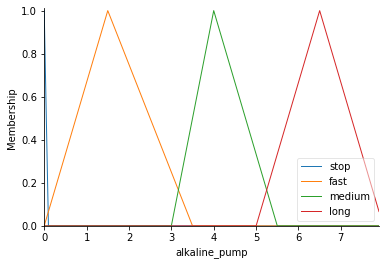

In [96]:
# # Generate fuzzy membership functions for output PH Pump Duration
alkaline_pump_membership["stop"] = fuzz.trimf(alkaline_pump_membership.universe,[ 0,0,0])
alkaline_pump_membership["fast"] = fuzz.trimf(alkaline_pump_membership.universe,[0,1.5,3.5])
alkaline_pump_membership["medium"] = fuzz.trimf(alkaline_pump_membership.universe,[3,4,5.5])
alkaline_pump_membership["long"] = fuzz.trimf(alkaline_pump_membership.universe,[ 5,6.5,8])
alkaline_pump_membership.view()

In [97]:
#Define Rules
rules = []


rules.append(
    ctrl.Rule(
        antecedent = (ph_membership['very_low'] & water_level_membership['low']),
        consequent= (ph_pump_membership['medium'] , alkaline_pump_membership['stop'])
    )
)
rules.append(
    ctrl.Rule(
        antecedent = (ph_membership['very_low'] & water_level_membership['normal']),
        consequent= (ph_pump_membership['medium'] , alkaline_pump_membership['stop'])
    )
)
rules.append(
    ctrl.Rule(
        antecedent = (ph_membership['very_low'] & water_level_membership['high']),
        consequent= (ph_pump_membership['long'] , alkaline_pump_membership['stop'])
    )
)


rules.append(
    ctrl.Rule(
        antecedent = (ph_membership['low'] & water_level_membership['low']),
        consequent= (ph_pump_membership['fast'] , alkaline_pump_membership['stop'])
    )
)
rules.append(
    ctrl.Rule(
        antecedent = (ph_membership['low'] & water_level_membership['normal']),
        consequent= (ph_pump_membership['medium'] , alkaline_pump_membership['stop'])
    )
)
rules.append(
    ctrl.Rule(
        antecedent = (ph_membership['low'] & water_level_membership['high']),
        consequent= (ph_pump_membership['medium'] , alkaline_pump_membership['stop'])
    )
)




rules.append(
    ctrl.Rule(
        antecedent = (ph_membership['normal']),
        consequent= (ph_pump_membership['stop'] , alkaline_pump_membership['stop'])
    )
)






rules.append(
    ctrl.Rule(
        antecedent = (ph_membership['high'] & water_level_membership['low']),
        consequent= (ph_pump_membership['stop'] , alkaline_pump_membership['fast'])
    )
)
rules.append(
    ctrl.Rule(
        antecedent = (ph_membership['high'] & water_level_membership['normal']),
        consequent= (ph_pump_membership['stop'] , alkaline_pump_membership['medium'])
    )
)
rules.append(
    ctrl.Rule(
        antecedent = (ph_membership['high'] & water_level_membership['high']),
        consequent= (ph_pump_membership['stop'] , alkaline_pump_membership['medium'])
    )
)


rules.append(
    ctrl.Rule(
        antecedent = (ph_membership['very_high'] & water_level_membership['low']),
        consequent= (ph_pump_membership['stop'] , alkaline_pump_membership['medium'])
    )
)
rules.append(
    ctrl.Rule(
        antecedent = (ph_membership['very_high'] & water_level_membership['normal']),
        consequent= (ph_pump_membership['stop'] , alkaline_pump_membership['medium'])
    )
)
rules.append(
    ctrl.Rule(
        antecedent = (ph_membership['very_high'] & water_level_membership['high']),
        consequent= (ph_pump_membership['stop'] , alkaline_pump_membership['long'])
    )
)


In [98]:
# create a control system via:
pump_ctrl = ctrl.ControlSystem(rules)

In [99]:
#In order to simulate this control system, we will create a ControlSystemSimulation. 
pump_sim = ctrl.ControlSystemSimulation(pump_ctrl)

In [133]:
pump_sim.input['ph'] = 14
pump_sim.input['water_level'] = 40
pump_sim.compute()

In [134]:
pump_sim.output

OrderedDict([('ph_pump', 0.04968815513626836),
             ('alkaline_pump', 6.454682432432431)])

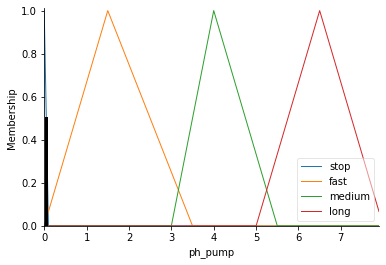

In [135]:
ph_pump_membership.view(sim=pump_sim)

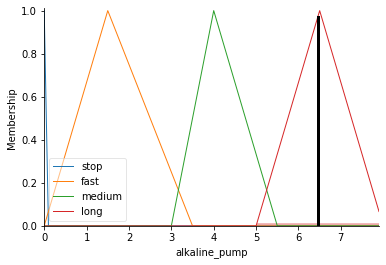

In [136]:
alkaline_pump_membership.view(sim=pump_sim)

In [104]:
    #Ref: 
#https://www.researchgate.net/profile/Nico-Surantha/publication/335861668_Intelligent_Monitoring_and_Controlling_System_for_Hydroponics_Precision_Agriculture/links/5e8c079f92851c2f52868179/Intelligent-Monitoring-and-Controlling-System-for-Hydroponics-Precision-Agriculture.pdf